In [277]:
import openweathermapy.core as ow
from citipy import citipy
import matplotlib.pyplot as plt
import requests as req
import numpy as np
import seaborn as sns
import time
from secrets import API_KEY

In [278]:
# Create random latitudes from -90 to 90
world_city_lat = np.random.uniform(low=-90.0, high=90.0, size=(500,))
world_city_lat = np.round( [float(i) for i in world_city_lat], 2)
world_city_lat

array([-86.53, -26.66,  61.42, -73.52,  68.39,  85.07,  18.59,  57.71,
       -45.08, -61.5 , -89.49,  -4.74,  22.31,  20.43,  75.69, -23.49,
       -32.73, -81.51, -57.23,  85.6 ,  81.87, -59.14, -20.54, -22.95,
       -62.72,  37.23,  62.1 ,  68.11,  39.26, -41.82, -80.79,  89.71,
       -72.47,  45.79,  51.99, -33.24, -58.89, -89.15,  15.55, -32.02,
       -70.57,  74.4 ,  53.75, -52.63,  75.75,  52.02, -40.48,  25.  ,
        52.39, -75.75,  60.15,  28.  , -49.4 ,  36.68,   1.95,   4.29,
       -85.7 , -82.38,  43.95, -75.11,  39.65, -50.34, -66.69, -68.74,
       -12.14,  -9.24, -41.72,  14.23,  32.04, -72.09,  34.8 ,  53.81,
        77.14,  41.79,  73.89,  21.47, -14.13, -31.12, -23.82, -73.  ,
       -72.35,  -5.75,  71.06,  12.05,   0.19,   6.03,  72.04, -12.82,
        61.24, -61.54,  13.7 ,  42.93,  49.88,  17.65, -43.44,  19.28,
       -18.55, -35.76, -52.79,  74.99, -62.66, -23.64,  -3.55,  -6.91,
        85.17,   5.56, -35.28, -45.61,  64.5 ,  23.69,  35.82,  76.97,
      

In [279]:
# Create random longitudes from -180 to 180
world_city_lon = np.random.uniform(low=-180.0, high=180.0, size=(500,))
world_city_lon = np.round( [float(i) for i in world_city_lon], 2)
world_city_lon

array([  74.3 , -123.85,   73.07,   50.01,  -64.02,  -53.37,  -67.54,
       -130.43,   12.  ,   38.66,   67.95, -129.52,   44.37, -159.43,
       -159.66,  -66.66,   70.55,   43.33,    8.66,   27.33,  -61.78,
         63.51,  -55.36,  137.26, -135.71,  175.78,  144.05,  105.45,
         46.12,   33.24,   96.34,   48.3 ,   18.11,   33.85, -115.85,
          2.56,  162.9 ,  122.5 ,  160.96,  -78.09,  -52.26,  -77.34,
       -128.45,  128.57,  158.87,  134.29, -121.03,    7.31,  137.99,
       -106.01, -170.11,  -21.76, -133.1 ,  -38.16,  118.52,   82.01,
          9.03,  139.66, -149.32,   29.73,   57.32,   98.54,  -72.47,
        -76.65,   -0.43,  -45.82,  149.31,  -11.8 ,  -53.18,  171.5 ,
       -174.51,  122.97,   -0.97,  165.82,  152.08,  158.93,   86.18,
        166.38, -127.17,    8.04,   96.98, -138.65,  -73.15,  133.73,
        168.65,   67.51,   61.98,  134.08,  -83.81,  -38.6 ,   39.22,
        170.07,  -65.92,   20.03, -172.47,  -28.77, -154.04,   11.25,
         48.33,   25

In [280]:
world_city_lat_lons = list(zip(world_city_lat,world_city_lon))
world_city_lat_lons= np.asarray(world_city_lat_lons)
world_city_lat_lons

array([[ -8.65300000e+01,   7.43000000e+01],
       [ -2.66600000e+01,  -1.23850000e+02],
       [  6.14200000e+01,   7.30700000e+01],
       [ -7.35200000e+01,   5.00100000e+01],
       [  6.83900000e+01,  -6.40200000e+01],
       [  8.50700000e+01,  -5.33700000e+01],
       [  1.85900000e+01,  -6.75400000e+01],
       [  5.77100000e+01,  -1.30430000e+02],
       [ -4.50800000e+01,   1.20000000e+01],
       [ -6.15000000e+01,   3.86600000e+01],
       [ -8.94900000e+01,   6.79500000e+01],
       [ -4.74000000e+00,  -1.29520000e+02],
       [  2.23100000e+01,   4.43700000e+01],
       [  2.04300000e+01,  -1.59430000e+02],
       [  7.56900000e+01,  -1.59660000e+02],
       [ -2.34900000e+01,  -6.66600000e+01],
       [ -3.27300000e+01,   7.05500000e+01],
       [ -8.15100000e+01,   4.33300000e+01],
       [ -5.72300000e+01,   8.66000000e+00],
       [  8.56000000e+01,   2.73300000e+01],
       [  8.18700000e+01,  -6.17800000e+01],
       [ -5.91400000e+01,   6.35100000e+01],
       [ -

In [281]:
cities = []
for coordinate_pair in world_city_lat_lons:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
candidate_cities = []
for city in cities:
    if city not in candidate_cities:
        candidate_cities.append(city.city_name)
candidate_cities


['busselton',
 'rikitea',
 'barsovo',
 'port alfred',
 'pangnirtung',
 'upernavik',
 'rincon',
 'ketchikan',
 'cape town',
 'port alfred',
 'taolanaro',
 'atuona',
 'riyadh',
 'nanakuli',
 'barrow',
 'jujuy',
 'mahebourg',
 'port alfred',
 'hermanus',
 'longyearbyen',
 'narsaq',
 'taolanaro',
 'anastacio',
 'mount isa',
 'rikitea',
 'nikolskoye',
 'artyk',
 'khatanga',
 'sisian',
 'east london',
 'albany',
 'belushya guba',
 'bredasdorp',
 'voyinka',
 'banff',
 'luderitz',
 'bluff',
 'new norfolk',
 'butaritari',
 'valparaiso',
 'ushuaia',
 'qaanaaq',
 'kitimat',
 'mount gambier',
 'cherskiy',
 'sofiysk',
 'rikitea',
 'gat',
 'imeni poliny osipenko',
 'punta arenas',
 'provideniya',
 'los llanos de aridane',
 'rikitea',
 'ribeira grande',
 'tarakan',
 'hambantota',
 'hermanus',
 'hobart',
 'kodiak',
 'port elizabeth',
 'baherden',
 'busselton',
 'ushuaia',
 'ushuaia',
 'jamestown',
 'morros',
 'launceston',
 'kayes',
 'saint george',
 'bluff',
 'kapaa',
 'urusha',
 'barentsburg',
 'sev

In [282]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + API_KEY + "&units=" + units + "&q="
query_url

#settings = {"units": "imperial", "appid": API_KEY}
#weather_data.append([ow.get_current(city, **settings) for city in candidate_cities])

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q='

In [283]:
for city in candidate_cities:
    time.sleep(.5)
    weather_data.append(req.get(query_url + city).json())
    print (query_url + city)
weather_data


http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=busselton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barsovo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port alfred
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=upernavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rincon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperia

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=butaritari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ahipara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=albany
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imper

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hachinohe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=albany
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barrow
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hatillo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nantucket
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ye

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=quelimane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tunduru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tarko-sale
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=avarua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mataura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=waw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hilo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=albany
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=adrar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fomboni
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=illoqqortoormiut
h

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sabha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hobart
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=poya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=busselton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=shache
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zhoucheng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=atuon

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vanimo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=naftah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barrow
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hilotongan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=thompson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=

[{'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 37.78, 'lon': -122.42},
  'dt': 1520225880,
  'id': 5391959,
  'main': {'humidity': 70,
   'pressure': 1026,
   'temp': 44.46,
   'temp_max': 50,
   'temp_min': 37.4},
  'name': 'San Francisco',
  'sys': {'country': 'US',
   'id': 478,
   'message': 0.0046,
   'sunrise': 1520260500,
   'sunset': 1520302058,
   'type': 1},
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
    'icon': '01n',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 290, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 40.42, 'lon': -3.7},
  'dt': 1520226000,
  'id': 3117735,
  'main': {'humidity': 87,
   'pressure': 995,
   'temp': 44.6,
   'temp_max': 44.6,
   'temp_min': 44.6},
  'name': 'Madrid',
  'sys': {'country': 'ES',
   'id': 5488,
   'message': 0.0057,
   'sunrise': 1520232135,
   'sunset': 1520273449,
   'type': 1},
  'visibility': 10000,
  'weather': [{'

In [284]:
# create lists for each attribute
city_lat, city_wind, city_cloudiness, city_humidity, city_temp = ([] for i in range(5))
num_cities = len(candidate_cities)
num_cities






500

In [294]:
#get lat,temp,speed,cloudiness and humidity for each city
for i in range(num_cities):
    city_lat.append(weather_data[i]['coord']['lat'])
    city_temp.append(weather_data[i]['main']['temp'])
    city_wind.append(weather_data[i]['wind']['speed'])
    city_cloudiness.append(weather_data[i]['clouds']['all'])
    city_humidity.append(weather_data[i]['main']['humidity'])


KeyError: 'coord'

In [286]:
# set variables for plot
x = city_lat
y = city_temp

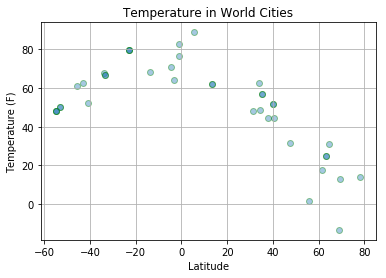

In [287]:
# plot latitude and temperature
plt.scatter(x,y,  alpha=.4, edgecolors="green")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.legend()
# Save the figure
plt.savefig("TemperatureinWorldCities.png")
plt.show()

In [288]:
#set y axis with humidity
y = city_humidity

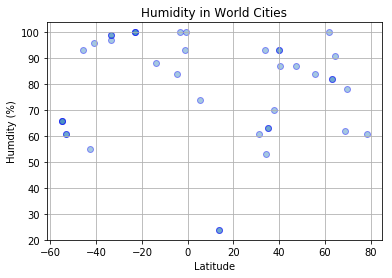

In [289]:
#plot latitude and humidity
plt.scatter(x,y,  alpha=.4, edgecolors="blue")
plt.title("Humidity in World Cities")
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid()
#save plot
plt.savefig("HumidityinWorldCities.png")
plt.show()

In [290]:
#set y axis with cloudiness
y = city_cloudiness

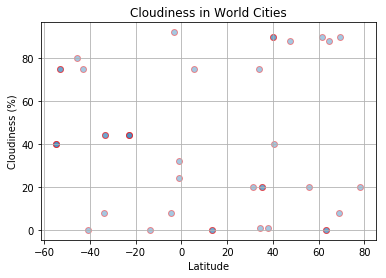

In [291]:
# plot latitude and cloudiness
plt.scatter(x,y,  alpha=.4, edgecolors="red")
#plt.scatter(x,y,z,w, 'filled')
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# save plot
plt.savefig("CloudinessinWorldCities.png")
plt.show()

In [292]:
# set y axis with wind
y = city_wind

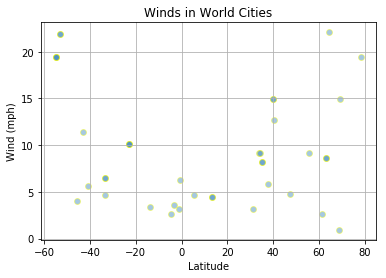

In [293]:
#plot latitude and wind
plt.scatter(x,y,  alpha=.4, edgecolors="yellow")
plt.title("Winds in World Cities")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid()
#save plot
plt.savefig("WindsinWorldCities.png")
plt.show()